In [1]:
import pandas as pd
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression



In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df = df.dropna()

In [4]:
Xcols = df[['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]


Ycols = df['Life expectancy ']

In [5]:

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(Xcols)

# Normalize and scale the features
scaler = StandardScaler()
X = scaler.fit_transform(Xcols)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Ycols, test_size=0.2, random_state=42)

In [6]:
# Create a linear regression model
model = LinearRegression()

In [7]:
# Train the model on the training dataset
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Evaluate the model on the testing dataset
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)
print('R-squared Score: ', r2)

Mean Squared Error:  13.53803733102842
R-squared Score:  0.8093837827566185


In [9]:
for i, feature in enumerate(Xcols.columns):
    print(f'{feature}: {model.coef_[i]}')

Adult Mortality: -2.097294112137923
infant deaths: 11.726213641630705
Alcohol: -0.3190604576874548
percentage expenditure: 0.7603476763163625
Hepatitis B: -0.19535272322289174
Measles : -0.07870355990989096
 BMI : 0.524590084901
under-five deaths : -11.92990079934738
Polio: 0.21036717200309984
Total expenditure: 0.21883310861760102
Diphtheria : 0.30273154981656153
 HIV/AIDS: -2.6091293038503425
GDP: -0.001646463858151946
Population: 0.04299785306474557
 thinness  1-19 years: -0.19443167357279867
 thinness 5-9 years: -0.22536316923927144
Income composition of resources: 1.6287778513141948
Schooling: 2.7034783348127465


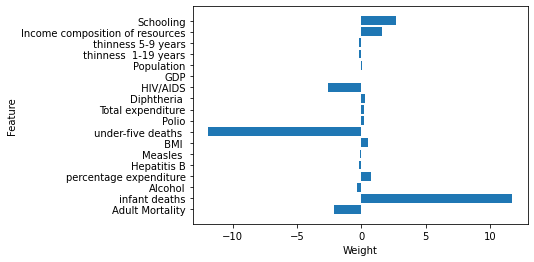

In [10]:
plt.barh(Xcols.columns, model.coef_)
plt.xlabel('Weight')
plt.ylabel("Feature")
plt.show()

In [11]:
x = torch.tensor(X_train)
x = x.to(torch.float32)
y = torch.tensor(y_train.values)
y = y.to(torch.float32)
td = torch.utils.data.TensorDataset(x, y)

In [12]:
dl = torch.utils.data.DataLoader(td, batch_size = 10, shuffle = True)
lm = torch.nn.Linear(x.shape[1], 1)
opt = torch.optim.SGD(lm.parameters(), lr = .00025, momentum = .99, weight_decay = .99)
loss_fn = torch.nn.MSELoss()


for epoch in range(65):
    for batchx, batchy in dl:
        batchx = batchx.to(torch.float32)
        opt.zero_grad()
        outputs = lm(batchx)
        loss = loss_fn(outputs, batchy)
        loss = loss.to(torch.float32)
        loss.backward()
        opt.step()
        
    x, y = td[:]
    print(epoch,loss_fn(y,lm(x)))
    

    

/Users/joemahoney/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/joemahoney/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/joemahoney/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1319, 1])) that is different to the input size (torch.Size([1319])). This will likely lead to incorrect results due to broadcasting. Ple

0 tensor(89.1172, grad_fn=<MseLossBackward0>)
1 tensor(1194.7787, grad_fn=<MseLossBackward0>)
2 tensor(473.4421, grad_fn=<MseLossBackward0>)
3 tensor(615.5065, grad_fn=<MseLossBackward0>)
4 tensor(620.8213, grad_fn=<MseLossBackward0>)
5 tensor(612.1671, grad_fn=<MseLossBackward0>)
6 tensor(682.2482, grad_fn=<MseLossBackward0>)
7 tensor(609.1402, grad_fn=<MseLossBackward0>)
8 tensor(611.3426, grad_fn=<MseLossBackward0>)
9 tensor(610.9789, grad_fn=<MseLossBackward0>)
10 tensor(666.2082, grad_fn=<MseLossBackward0>)
11 tensor(668.0471, grad_fn=<MseLossBackward0>)
12 tensor(616.3881, grad_fn=<MseLossBackward0>)
13 tensor(606.6595, grad_fn=<MseLossBackward0>)
14 tensor(617.1664, grad_fn=<MseLossBackward0>)
15 tensor(597.4505, grad_fn=<MseLossBackward0>)
16 tensor(612.7500, grad_fn=<MseLossBackward0>)
17 tensor(598.5725, grad_fn=<MseLossBackward0>)
18 tensor(607.5682, grad_fn=<MseLossBackward0>)
19 tensor(606.4135, grad_fn=<MseLossBackward0>)
20 tensor(616.8484, grad_fn=<MseLossBackward0>)
21